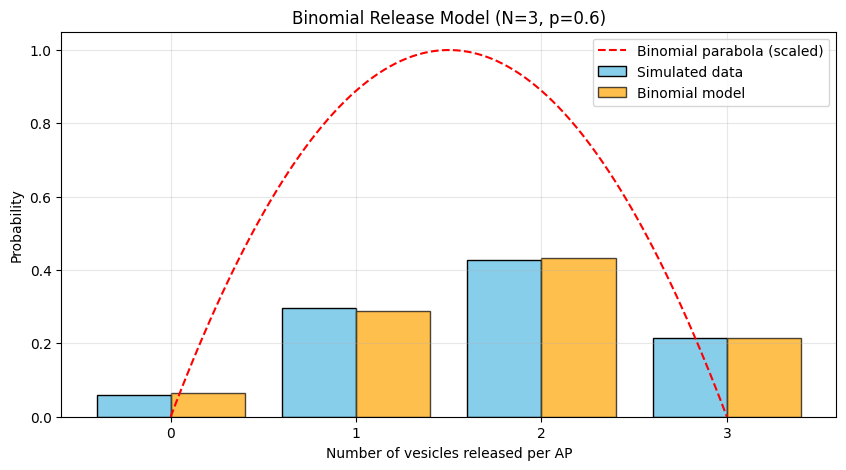

Observed vs theoretical probabilities:
  0 vesicles: observed = 0.060, expected = 0.064
  1 vesicles: observed = 0.297, expected = 0.288
  2 vesicles: observed = 0.428, expected = 0.432
  3 vesicles: observed = 0.215, expected = 0.216


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters from the paper (figure 9)
N = 3          # number of docking sites
p = 0.6        # release probability per site
n_trials = 10000  # number of AP trials to simulate

# Simulate number of vesicles released per AP
release_counts = np.random.binomial(N, p, size=n_trials)

# Observed histogram
values, counts = np.unique(release_counts, return_counts=True)
observed_freq = counts / n_trials

# Theoretical binomial probabilities
x = np.arange(0, N+1)
theoretical_probs = stats.binom.pmf(x, N, p)

# Plot histogram of observed data
plt.figure(figsize=(10,5))

# Histogram (bars)
plt.bar(values - 0.2, observed_freq, width=0.4, label="Simulated data", color="skyblue", edgecolor="black")

# Theoretical distribution (bars)
plt.bar(x + 0.2, theoretical_probs, width=0.4, label="Binomial model", color="orange", alpha=0.7, edgecolor="black")

# Overlay parabola-like variance–mean curve
means = np.linspace(0, N, 100)
variances = means - (means**2 / N)  # Var = mean - mean^2/N
plt.plot(means, variances/np.max(variances), 'r--', label="Binomial parabola (scaled)")

# Labels and legend
plt.xlabel("Number of vesicles released per AP")
plt.ylabel("Probability")
plt.title(f"Binomial Release Model (N={N}, p={p})")
plt.xticks(x)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Print summary stats
print("Observed vs theoretical probabilities:")
for val in x:
    obs = observed_freq[values == val][0] if val in values else 0
    print(f"  {val} vesicles: observed = {obs:.3f}, expected = {theoretical_probs[val]:.3f}")

This code is modeled after Figure 9C in this paper: https://www.jneurosci.org/content/36/14/4010?utm_source=chatgpt.com